# 2
Suppose that we have four observations, for which we compute a
dissimilarity matrix, given by

$$\begin{bmatrix}
    0.0   & 0.3 & 0.4 & 0.7 \\
    0.3   & 0.0 & 0.5 & 0.8 \\
    0.4   & 0.5 & 0.0 & 0.45 \\
    0.7   & 0.8 & 0.45 & 0.0 
\end{bmatrix}
$$

For instance, the dissimilarity between the first and second observations
is 0.3, and the dissimilarity between the second and fourth
observations is 0.8.

# 2a)

On the basis of this dissimilarity matrix, sketch the dendrogram
that results from hierarchically clustering these four observations
using complete linkage. Be sure to indicate on the plot the
height at which each fusion occurs, as well as the observations
corresponding to each leaf in the dendrogram.

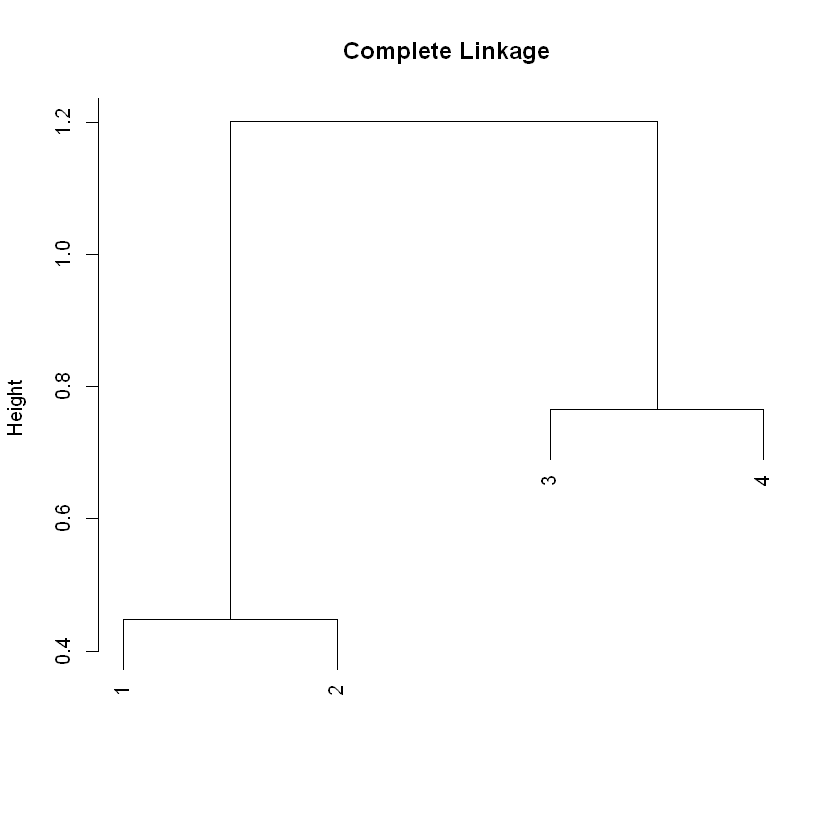

In [37]:
# ref p.406

mat = matrix(c(0, 0.3, 0.4, 0.7, 
               0.3, 0, 0.5, 0.8,
               0.4, 0.5, 0.0, 0.45,
               0.7, 0.8, 0.45, 0.0), nrow = 4)

dd = dist(mat)
plot(
    hclust(dd, method="complete"), 
    main=" Complete Linkage", 
    xlab="", 
    sub =""
)

# (b) 

Repeat (a), this time using single linkage clustering.

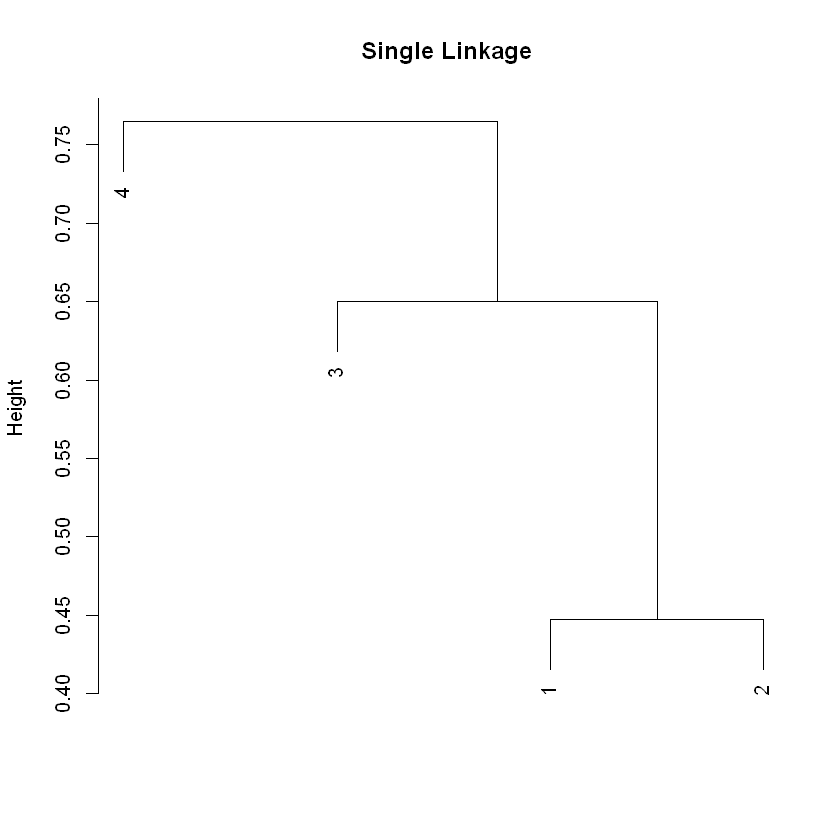

In [38]:
plot(
    hclust(dd, method="single"), 
    main=" Single Linkage", 
    xlab="", 
    sub =""
)

# c)

Suppose that we cut the dendogram obtained in (a) such that
two clusters result. Which observations are in each cluster?

In [39]:
# ref p.412
table(
    cutree(hclust(dd, method="complete"), 2)
)


1 2 
2 2 

# d)
Suppose that we cut the dendogram obtained in (b) such that
two clusters result. Which observations are in each cluster?

In [40]:
table(
    cutree(hclust(dd, method="single"), 2)
)


1 2 
3 1 

# e)

It is mentioned in the chapter that at each fusion in the dendrogram,
the position of the two clusters being fused can be
swapped without changing the meaning of the dendrogram. Draw
a dendrogram that is equivalent to the dendrogram in (a), for
which two or more of the leaves are repositioned, but for which
the meaning of the dendrogram is the same.

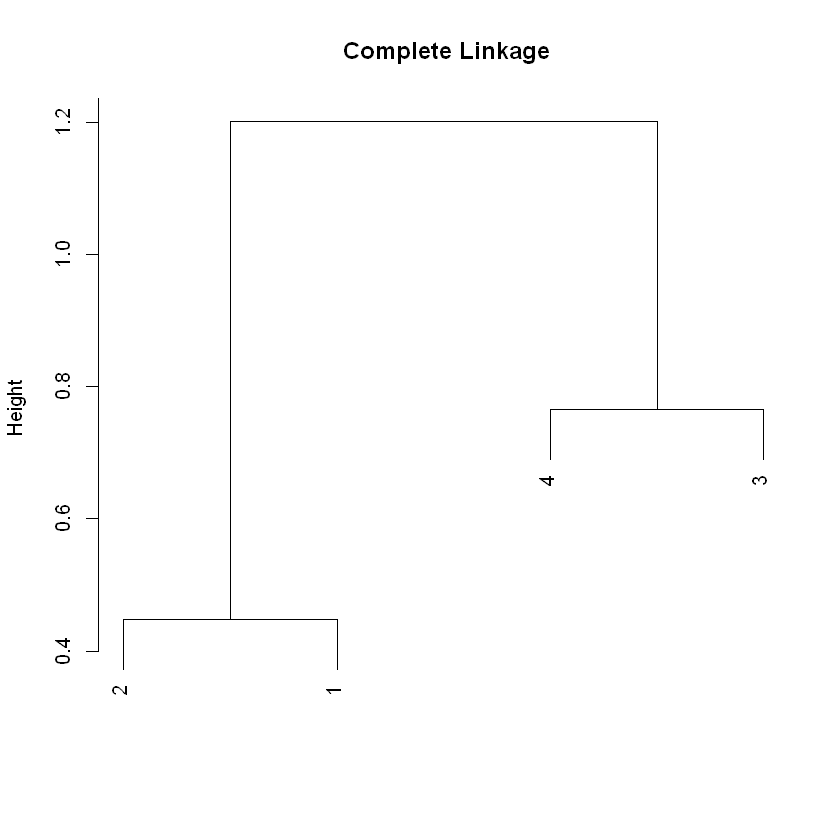

In [41]:
plot(
    hclust(dd, method="complete"), 
    labels = c(2,1,4,3),
    main=" Complete Linkage", 
    xlab="", 
    sub =""
)

# 9) 

Consider the USArrests data. We will now perform hierarchical clustering
on the states.

## (a) 

Using hierarchical clustering with **complete** linkage and
Euclidean distance, cluster the states.

In [42]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [48]:
?hclust

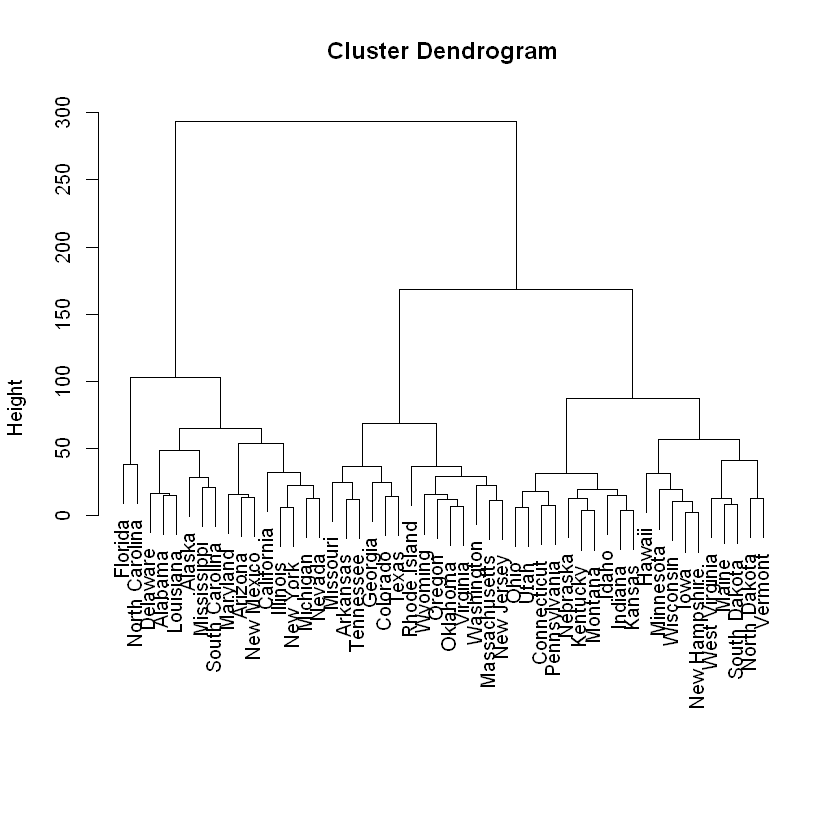

In [71]:
hc.us = hclust(dist(USArrests), method="complete")
plot(
    hc.us, 
    xlab="", 
    sub =""
)

## (b) 

Cut the dendrogram at a height that results in **three** distinct
clusters. Which states belong to which clusters?

In [74]:
hc.us.cut = cutree(hc.us, 3)

data.frame(hc.us.cut)

,hc.us.cut
,<int>
Alabama,1
Alaska,1
Arizona,1
Arkansas,2
California,1
Colorado,2
Connecticut,3
Delaware,1
Florida,1


## (c) 

Hierarchically cluster the states using **complete** linkage and Euclidean
distance, after scaling the variables to have **standard deviation one**.

In [82]:
?scale

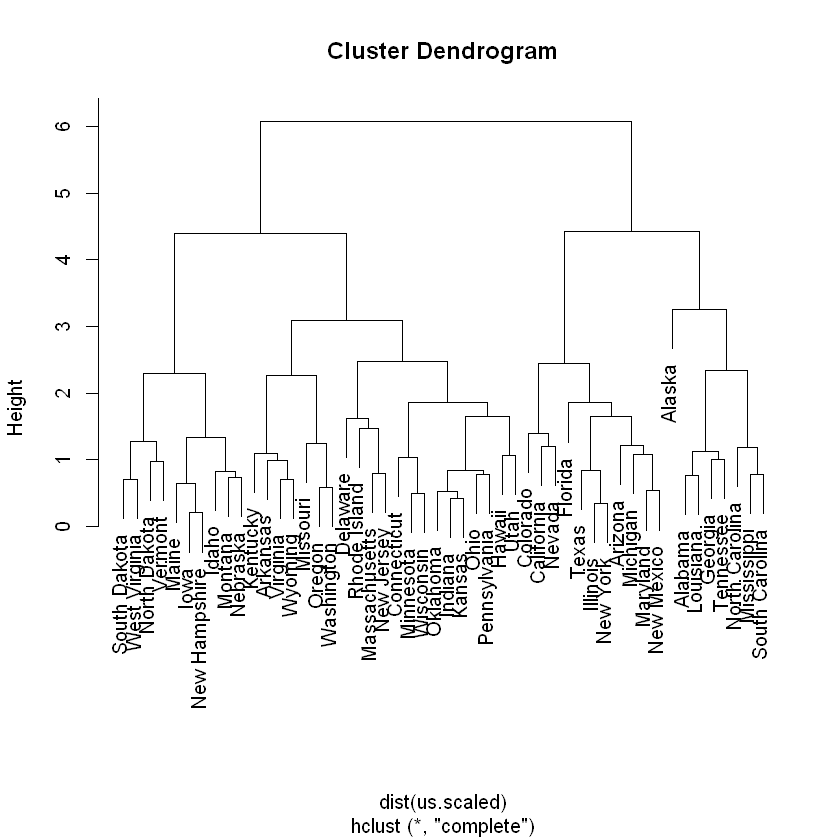

In [83]:
us.scaled = scale(USArrests, scale=T, center=T)

hc.us.scaled = hclust(dist(us.scaled), method="complete")
plot(hc.us.scaled)

## (d) 

What effect does scaling the variables have on the hierarchical
clustering obtained? In your opinion, should the variables be
scaled before the inter-observation dissimilarities are computed?
Provide a justification for your answer.

In this case, the variables should be scaled as the `Murder` and `Rape` variables are given in differents units than the others. As the authors describe, if the variables are scaled so that each has a standard deviation of one before calculating the distances between observations, it will ensure that each variable is given an equal weight in the hierarchical clustering. Additionally, we want to scale the variables to have
standard deviation one if they are measured on different scales; otherwise,
the choice of units for a particular variable
will greatly affect the dissimilarity measure obtained (James et al., 2013).